In [10]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset to inspect its contents
file_path = 'data/monatszahlen2405_verkehrsunfaelle_export_31_05_24_r.csv'
data = pd.read_csv(file_path)

# Filter for the relevant category and type
filtered_data = data[
    (data['MONATSZAHL'] == 'Alkoholunfälle') &
    (data['AUSPRAEGUNG'] == 'insgesamt') &
    (data['JAHR'] <= 2020)
]

In [11]:
# Check the filtered data
filtered_data = filtered_data[['JAHR', 'MONAT', 'WERT']].dropna()

# Remove summary rows and convert month to datetime
filtered_data = filtered_data[filtered_data['MONAT'] != 'Summe']
filtered_data['MONTH'] = pd.to_datetime(filtered_data['JAHR'].astype(str) + filtered_data['MONAT'].str[-2:], format='%Y%m')

# Set datetime as the index and sort by it
filtered_data = filtered_data[['MONTH', 'WERT']].set_index('MONTH').sort_index()

In [12]:
# Train an ARIMA model
# Starting with (p, d, q) = (1, 1, 1) as initial parameters
model = ARIMA(filtered_data['WERT'], order=(1, 1, 1))
fitted_model = model.fit()

# Forecast for January 2021
forecast = fitted_model.get_forecast(steps=1)
forecast_value = forecast.predicted_mean.iloc[0]

# Correct the forecasted date to datetime format
forecast_date = pd.to_datetime('2021-01-01')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


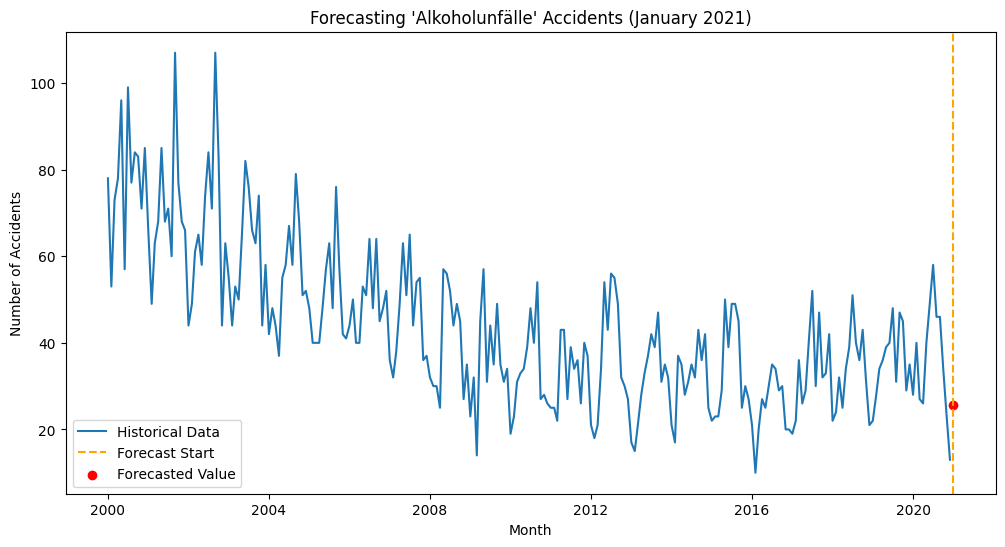

25.62254275070203

In [13]:
# Visualize the data with corrected datetime conversion
plt.figure(figsize=(12, 6))
plt.plot(filtered_data, label="Historical Data")
plt.axvline(x=forecast_date, color='orange', linestyle='--', label="Forecast Start")
plt.scatter(forecast_date, forecast_value, color='red', label="Forecasted Value")
plt.title("Forecasting 'Alkoholunfälle' Accidents (January 2021)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.legend()
plt.show()

forecast_value

In [15]:
# Extract the ground truth value for January 2021
ground_truth = data[
    (data['MONATSZAHL'] == 'Alkoholunfälle') &
    (data['AUSPRAEGUNG'] == 'insgesamt') &
    (data['JAHR'] == 2021) &
    (data['MONAT'] == '202101')
]['WERT'].values

# Compute error metrics if ground truth is available
if len(ground_truth) > 0:
    ground_truth_value = ground_truth[0]
    absolute_error = abs(ground_truth_value - forecast_value)
    percentage_error = (absolute_error / ground_truth_value) * 100

    print("### ERROR ANALYSIS ###")
    print("Ground Truth:", ground_truth_value)
    print("Absolute Error:", absolute_error)
    print("Percentage Error:", percentage_error, "%")
else:
    "Ground truth for January 2021 is not available."

### ERROR ANALYSIS ###
Ground Truth: 16.0
Absolute Error: 9.622542750702031
Percentage Error: 60.140892191887694 %


The error rate is too high. Should explore:
 - EDA
 - Hyperparameter tuning
 - Auto-ARIMA
 - Model selection